In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline
#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [ ]:
pandas_df = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA19_official_data.csv')
pandas_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause
0,176580,L. Suárez,31,https://cdn.sofifa.com/players/176/580/19_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,91,91,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€164M
1,194765,A. Griezmann,27,https://cdn.sofifa.com/players/194/765/19_60.png,France,https://cdn.sofifa.com/flags/fr.png,89,89,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,54.0,48.0,14.0,8.0,14.0,13.0,14.0,LW,87.0,€145.6M
2,177003,L. Modrić,32,https://cdn.sofifa.com/players/177/003/19_60.png,Croatia,https://cdn.sofifa.com/flags/hr.png,91,91,Real Madrid,https://cdn.sofifa.com/teams/243/light_30.png,...,76.0,73.0,13.0,9.0,7.0,14.0,9.0,CM,88.0,€137.4M
3,224334,M. Acuña,26,https://cdn.sofifa.com/players/224/334/19_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,81,81,Sporting CP,https://cdn.sofifa.com/teams/237/light_30.png,...,80.0,75.0,8.0,14.0,13.0,13.0,14.0,LM,81.0,€38M
4,192985,K. De Bruyne,27,https://cdn.sofifa.com/players/192/985/19_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,CAM,89.0,€172.1M


In [3]:
#Diff between 17, 18 and 19 is that 18,19 have an extra column called 'Release Clause'

## DATA STRUCTURE/SHAPE/INFO

In [4]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17943 entries, 0 to 17942
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17943 non-null  int64  
 1   Name                      17943 non-null  object 
 2   Age                       17943 non-null  int64  
 3   Photo                     17943 non-null  object 
 4   Nationality               17943 non-null  object 
 5   Flag                      17943 non-null  object 
 6   Overall                   17943 non-null  int64  
 7   Potential                 17943 non-null  int64  
 8   Club                      17705 non-null  object 
 9   Club Logo                 17943 non-null  object 
 10  Value                     17943 non-null  object 
 11  Wage                      17943 non-null  object 
 12  Special                   17943 non-null  int64  
 13  Preferred Foot            17943 non-null  object 
 14  Intern

In [5]:
pandas_df.shape

(17943, 64)

In [6]:
pandas_df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKPositioning          float64
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Release Clause          object
Length: 64, dtype: object

In [ ]:
import polars as pl
polars_df = pl.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA19_official_data.csv')

In [8]:
polars_df.head(10)

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause
i64,str,i64,str,str,str,i64,i64,str,str,str,str,i64,str,f64,f64,f64,str,str,str,str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str
176580,""" L. Suárez""",31,"""https://cdn.sofifa.com/players…","""Uruguay""","""https://cdn.sofifa.com/flags/u…",91,91,"""FC Barcelona""","""https://cdn.sofifa.com/teams/2…","""€80M""","""€450K""",2349,"""Right""",5.0,4.0,3.0,"""High/ Medium""","""Normal (170-185)""","""Yes""","""<span class=""pos pos25"">ST""",9.0,"""Jul 11, 2014""","""nan""","""2021""","""6'0""","""190lbs""",77.0,92.0,82.0,82.0,90.0,86.0,86.0,84.0,69.0,88.0,83.0,73.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,"""ST""",87.0,"""€164M"""
194765,""" A. Griezmann""",27,"""https://cdn.sofifa.com/players…","""France""","""https://cdn.sofifa.com/flags/f…",89,89,"""Atlético Madrid""","""https://cdn.sofifa.com/teams/2…","""€71M""","""€140K""",2293,"""Left""",4.0,3.0,4.0,"""High/ High""","""Lean (170-185)""","""Yes""","""<span class=""pos pos24"">RS""",7.0,"""Jul 28, 2014""","""nan""","""2023""","""5'9""","""161lbs""",82.0,89.0,84.0,84.0,87.0,87.0,86.0,84.0,78.0,90.0,88.0,85.0,90.0,90.0,82.0,82.0,90.0,86.0,62.0,82.0,73.0,49.0,91.0,85.0,83.0,89.0,59.0,54.0,48.0,14.0,8.0,14.0,13.0,14.0,"""LW""",87.0,"""€145.6M"""
177003,""" L. Modrić""",32,"""https://cdn.sofifa.com/players…","""Croatia""","""https://cdn.sofifa.com/flags/h…",91,91,"""Real Madrid""","""https://cdn.sofifa.com/teams/2…","""€67M""","""€425K""",2284,"""Right""",4.0,4.0,4.0,"""High/ High""","""Lean (170-185)""","""Yes""","""<span class=""pos pos13"">RCM""",10.0,"""Aug 1, 2012""","""nan""","""2020""","""5'8""","""146lbs""",86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,92.0,78.0,72.0,92.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,92.0,68.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,"""CM""",88.0,"""€137.4M"""
224334,""" M. Acuña""",26,"""https://cdn.sofifa.com/players…","""Argentina""","""https://cdn.sofifa.com/flags/a…",81,81,"""Sporting CP""","""https://cdn.sofifa.com/teams/2…","""€19M""","""€20K""",2281,"""Left""",2.0,3.0,4.0,"""High/ High""","""Stocky (170-185)""","""No""","""<span class=""pos pos28"">SUB""",8.0,"""nan""","""nan""","""nan""","""5'8""","""152lbs""",87.0,66.0,63.0,78.0,68.0,87.0,87.0,78.0,76.0,85.0,79.0,75.0,84.0,80.0,86.0,83.0,69.0,90.0,84.0,84.0,88.0,76.0,77.0,82.0,74.0,88.0,78.0,80.0,75.0,8.0,14.0,13.0,13.0,14.0,"""LM""",81.0,"""€38M"""
192985,""" K. De Bruyne""",27,"""https://cdn.sofifa.com/players…","""Belgium""","""https://cdn.sofifa.com/flags/b…",91,91,"""Manchester City""","""https://cdn.sofifa.com/teams/1…","""€93M""","""€350K""",2279,"""Right""",4.0,5.0,4.0,"""High/ High""","""Normal (170-185)""","""Yes""","""<span class=""pos pos13"">RCM""",17.0,"""Aug 30, 2015""","""nan""","""2023""","""5'11""","""154lbs""",93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,89.0,75.0,90.0,76.0,61.0,87.0,94.0,79.0,90.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,"""CAM""",89.0,"""€172.1M"""
178518,""" R. Nainggolan""",30,"""https://cdn.sofifa.com/players…","""Belgium""","""https://cdn.sofifa.com/flags/b…",85,85,"""Inter""","""https://cdn.sofifa.com/teams/4…","""€35.5M""","""€100K""",2278,"""Right""

In [9]:
polars_df.shape

(17943, 64)

In [10]:
polars_df.dtypes

[Int64,
 String,
 Int64,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 Int64,
 String,
 Float64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 Float64,
 String,
 String,
 String,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 Float64,
 String]

In [11]:
from skimpy import skim
skim(pandas_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17943  │ │ float64     │ 39    │                                                          │
│ │ Number of columns │ 64     │ │ string      │ 20    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %            ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID             │  0 │               0 │ 216400 │  28990 │  16 │ 202000 │ 223700 │ 238400 │ 253200 │    ▁▃▇ │  │
│ │ Age            │  0 │               0 │   24.7 │  4.693 │  15 │     21 │     24 │     28 │     45 │  ▃▇▇▃  │  │
│ │ Overall        │  0 │               0 │  66.33 │   6.88 │  48 │     62 │     66 │     71 │     94 │ ▁▅▇▅▁  │  │
│ │ Potential      │  0 │               0 │  71.39 │  6.109 │  49 │     67 │     71 │     75 │     95 │  ▂▇▇▂  │  │
│ │ Special        │  0 │               0 │   1599 │  276.6 │ 718 │   1459 │   1639 │   1790 │   2349 │ ▁▂▃▇▃  │  │
│ │ International  │  0 │               0 │  1.108 │ 0.3856 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation     │    │                 │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot      │  0 │               0 │  2.947 │  0.665 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves    │  0 │               0 │  2.368 │ 0.7659 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▆▁  │  │
│ │ Jersey Number  │ 14 │ 0.0780248564899 │   20.5 │  16.53 │   1 │      9 │     18 │     28 │     99 │  ▇▆▂   │  │
│ │                │    │             961 │        │        │     │        │        │        │        │        │  │
│ │ Crossing       │  0 │               0 │  49.87 │  18.43 │   5 │     38 │     54 │     64 │     93 │ ▂▂▅▇▆  │  │
│ │ Finishing      │  0 │               0 │  45.48 │  19.61 │   2 │     30 │     49 │     62 │     95 │ ▃▅▆▇▅  │  │
│ │ HeadingAccurac │  0 │               0 │  52.24 │  17.49 │   4 │     45 │     56 │     64 │     94 │ ▂▁▃▇▅  │  │
│ │ y              │    │                 │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing   │  0 │               0 │  58.75 │  14.76 │   7 │     54 │     62 │     68 │     93 │  ▂▂▇▇▁ │  │
│ │ Volleys        │  0 │               0 │  42.86 │  17.78 │   3 │     30 │     44 │     57 │     90 │ ▃▅▇▇▅  │  │
│ │ Dribbling      │  0 │               0 │  55.46 │  19.05 │   4 │     49 │     61 │     68 │     97 │ ▂▁▂▇▆  │  │
│ │ Curve          │  0 │               0 │  47.34 │  18.52 │   6 │     34 │     49 │     62 │     94 │ ▃▅▇▇▅▁ │  │
│ │ FKAccuracy     │  0 │               0 │  42.77 │  17.56 │   3 │   30.5 │     41 │     56 │     94 │ ▃▅▇▅▃  │  │
│ │ LongPassing    │  0 │               0 │  52.89 │  15.31 │   9 │     43 │     56 │     64 │     93 │ ▁▃▃▇▅  │  │
│ │ BallControl    │  0 │               0 │  58.37 │  16

In [12]:
#skimpy supports polars dataframes as well
skim(polars_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17943  │ │ float64     │ 39    │                                                          │
│ │ Number of columns │ 64     │ │ string      │ 20    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %            ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID             │  0 │               0 │ 216400 │  28990 │  16 │ 202000 │ 223700 │ 238400 │ 253200 │    ▁▃▇ │  │
│ │ Age            │  0 │               0 │   24.7 │  4.693 │  15 │     21 │     24 │     28 │     45 │  ▃▇▇▃  │  │
│ │ Overall        │  0 │               0 │  66.33 │   6.88 │  48 │     62 │     66 │     71 │     94 │ ▁▅▇▅▁  │  │
│ │ Potential      │  0 │               0 │  71.39 │  6.109 │  49 │     67 │     71 │     75 │     95 │  ▂▇▇▂  │  │
│ │ Special        │  0 │               0 │   1599 │  276.6 │ 718 │   1459 │   1639 │   1790 │   2349 │ ▁▂▃▇▃  │  │
│ │ International  │  0 │               0 │  1.108 │ 0.3856 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation     │    │                 │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot      │  0 │               0 │  2.947 │  0.665 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves    │  0 │               0 │  2.368 │ 0.7659 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▆▁  │  │
│ │ Jersey Number  │ 14 │ 0.0780248564899 │   20.5 │  16.53 │   1 │      9 │     18 │     28 │     99 │  ▇▆▂   │  │
│ │                │    │             961 │        │        │     │        │        │        │        │        │  │
│ │ Crossing       │  0 │               0 │  49.87 │  18.43 │   5 │     38 │     54 │     64 │     93 │ ▂▂▅▇▆  │  │
│ │ Finishing      │  0 │               0 │  45.48 │  19.61 │   2 │     30 │     49 │     62 │     95 │ ▃▅▆▇▅  │  │
│ │ HeadingAccurac │  0 │               0 │  52.24 │  17.49 │   4 │     45 │     56 │     64 │     94 │ ▂▁▃▇▅  │  │
│ │ y              │    │                 │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing   │  0 │               0 │  58.75 │  14.76 │   7 │     54 │     62 │     68 │     93 │  ▂▂▇▇▁ │  │
│ │ Volleys        │  0 │               0 │  42.86 │  17.78 │   3 │     30 │     44 │     57 │     90 │ ▃▅▇▇▅  │  │
│ │ Dribbling      │  0 │               0 │  55.46 │  19.05 │   4 │     49 │     61 │     68 │     97 │ ▂▁▂▇▆  │  │
│ │ Curve          │  0 │               0 │  47.34 │  18.52 │   6 │     34 │     49 │     62 │     94 │ ▃▅▇▇▅▁ │  │
│ │ FKAccuracy     │  0 │               0 │  42.77 │  17.56 │   3 │   30.5 │     41 │     56 │     94 │ ▃▅▇▅▃  │  │
│ │ LongPassing    │  0 │               0 │  52.89 │  15.31 │   9 │     43 │     56 │     64 │     93 │ ▁▃▃▇▅  │  │
│ │ BallControl    │  0 │               0 │  58.37 │  16

In [13]:
from summarytools import dfSummary
dfSummary(pandas_df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 216448.0 (28988.7)min < med < max:16.0 < 223676.0 < 253155.0IQR (CV) : 36379.5 (7.5),"17,943 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAjhJREFUeJzt3T+O2kAYhvFv8ocYNniEkTgEewP6pMxhc4QUXCC0VHQWCJlA1loDTpUoKWCDB6/9Ws+vNSOmeCQ00jfYlWVpQNu9aXoDwP941/QG0B3Oub6Z9Soufy7L8unSQ0LFXTjn+uPx+Escx6Mq63e73dY59/VSrISKe+nFcTyazWZP3vv8loVZlkXz+Xy02Wx6ZkaoqJ/3Pp9MJj8rLO1fe8hhChIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRK4ioI/Am+Rxufz+f099/M3QoWZhd8iLYoiOp1Oj3mefzOzKnemriJU/Fb5FqmZ2Wq1Gi0Wi8HxeHxbx+YIFf+oeot0u91evUUaisMUJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDDm1zEBU/q1TuiHItQOCZnSr3tCPxShdkvlKf26J/RDEWoHVZnSr3tCPxSHKUggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEhgHrVl2vzChyYRaou0/YUPTSLUdmn1Cx+aRKgt1NYXPjSJwxQkECok8NNfg67+CUSTCPWCgNiiJEk+e+8fbl3Y5VN7qBdDdc5FZvbhFfbSJlGSJJ+89x9vXVgURWRmj9Pp9PtwOPxxy9r1eh0tl8tBlmUPaZo+3/rd+/0+MjM7HA5RmqaD11obuj7Lsuilz/wCzgG7Ufm2UbsAAAAASUVORK5CYII="">",0(0.0%)
2,Name[object],1. J. Rodríguez2. J. Williams3. J. Valencia4. J. Gómez5. J. Hernández6. R. Williams7. R. González8. J. García9. M. Gómez10. Felipe11. other,"8 (0.0%)8 (0.0%)7 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)17,878 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA0JJREFUeJzt3MFpG2EURtE3QiT2RkIIVELSg4rINh2riDRhpEXieOMsgkvIHZicU8G/uPAQzKfl/f19oLBb+wH8P8RGRmxkxEZGbGTERkZsZMRGRmxkxEZmtyzL12VZntZ+CNu3m5kvM/N57Yewfc4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZzcyPmfm99kPYvsW/GFFxRsmIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJbPMzPPMfFr7IWze2/58Pn87HA6ntV/Ctj0ej5f94XA4Xa/XX8fj8XXtB7FN9/v96Xa7nfYzM8fj8fVyufxc+1Fs2rMfCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGT2M38/AVn7IWzXR1/L+Xz+7uNJ/rXH4/His3Aqb9ZVZPxAICM2MmIjIzYyYiMjNjJiIyM2MmIj8wdFqVdsnnPGyQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Age[int64],Mean (sd) : 24.7 (4.7)min < med < max:15.0 < 24.0 < 45.0IQR (CV) : 7.0 (5.3),29 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqVJREFUeJzt3T2O2kAYgOFvwoIMSLYQEXRcIFIKSg6Rw6ZNFyROwA3okCwwwsHBGKfJptqwMDNe/I3epx+Y4hXyzwxj6roWoO0+PXsCwD1enj2BW4wxfRHpWQ4/13V98jkfPE9rQzXG9Mfj8bc4jkc24w+Hw84Y851Yw9DaUEWkF8fxaLFYnJIkKR4ZmGVZtFqtRmma9kSEUAPQ5lBFRCRJkmIymfx6dFxVVbGIxMYY26/m0qFFWh+qjTzPu2VZfp3NZp1Op/PQr/ErLh3aJchQz+fzSxRFg/l8Xkyn092j47l0aJ8gQ301HA6tLhv+6nudDJzwHBUqECpUIFSoQKhQgVChQqN3/Y7v6uPr9dr1OR/o1Vioru/qy7KMqqr6UhTFTxGxfcSEQDT5i2r9rl5EZLPZjNbr9eByuXSamBx0afyBv+27+t1uxwN3/MPNFFQI+hWqi6qqumK/+oqVV54R6htcV1+x8so/Qn2Dy+orVl41g1BvcFh9xY2gZ9xMQQVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqsCilAaxl9Y9QPWMtazMI1TPWsjaDUBvCWla/uJmCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFFk63jON+K5FA91wRaou47rcSCXfPFaG2iMt+K5Gw91wRags57LcSCXTP1buhOhy8y6G78OZmqC4H73LoLnx67xfV+uBdDt2FT3ddo9ocvMuhu/CJB/5QgVChAqFCBZ6jBibUv7wk1ICE/JeXhBoQ17+8XC6XkzRNPxtjDrZTaCryu0LNsix69IOPx2MkIpLnebTdbgcfOV7rd/

In [14]:
#summarytools does not support polars dataframes
# dfSummary(polars_df)

## NULL VALUES

In [15]:
#only club has null values
polars_df.null_count()

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
pandas_df.isna().sum().sort_values(ascending=False).head(20)
pandas_df.duplicated().sum(), pandas_df.duplicated(subset=['Name']).sum()  # adjust subset keys
pandas_df.select_dtypes('object').nunique().sort_values(ascending=False).head(20)  # high-cardinality cats

Photo                   17943
Name                    16977
Joined                   1873
Release Clause           1255
Club Logo                 682
Club                      651
Loaned From               383
Value                     220
Flag                      163
Nationality               163
Weight                     57
Wage                       42
Contract Valid Until       30
Position                   29
Height                     21
Body Type                  17
Best Position              15
Work Rate                   9
Real Face                   2
Preferred Foot              2
dtype: int64

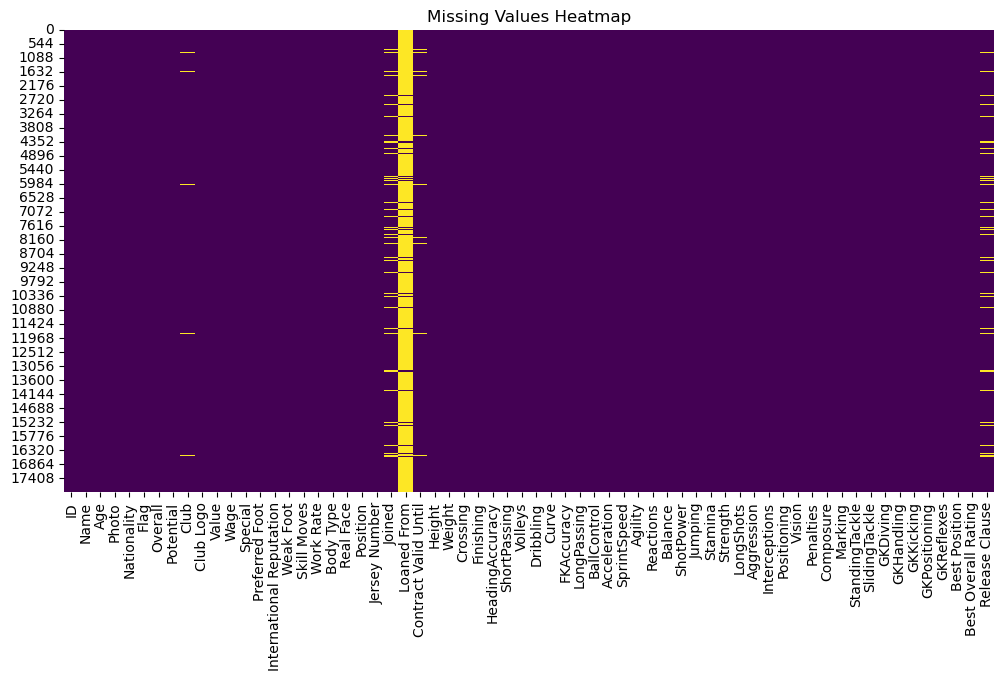

In [17]:
#heatmap of missing values shows only club has missing values of type MCAR (Missing Completely at Random)
#I want to understand the pattern of missingness, why is the data missing?
#nan values in "loaned from" column are because the player is not on loan
#nan values in "club" column are because the player is a free agent
plt.figure(figsize=(12, 6))
sns.heatmap(pandas_df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Cleaning

In [18]:
#dropping columns that are not useful for analysis
#these columns are images and logos links which do not add value to the analysis
col = ['Photo','Flag','Club Logo']
fifa = pandas_df.drop(columns = col, axis = 1)
fifa.shape

(17943, 61)

In [19]:
#Clean position column as it has some junk span classes data
#What is difference between position and best position?
#Convert value and wage to numeric
#What is the special column?
#Body type has easter egg values like "Messi" and "C. Ronaldo"
#Convert height and weight to numeric
#Convert work rate to categorical low, medium, high
#Convert joined date to datetime
#Find Loan Sharks from loaned from column

In [20]:
#Clean position column
import re

pattern = re.compile(r">([^<]+)$")  # capture everything between > and <

fifa["Position_clean"] = fifa["Position"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Position", "Position_clean", "Best Position"]].head(10))


                      Position Position_clean Best Position
0   <span class="pos pos25">ST             ST            ST
1   <span class="pos pos24">RS             RS            LW
2  <span class="pos pos13">RCM            RCM            CM
3  <span class="pos pos28">SUB            SUB            LM
4  <span class="pos pos13">RCM            RCM           CAM
5  <span class="pos pos18">CAM            CAM           CDM
6  <span class="pos pos28">SUB            SUB           CAM
7    <span class="pos pos7">LB             LB            LM
8    <span class="pos pos7">LB             LB           LWB
9  <span class="pos pos28">SUB            SUB            ST


In [21]:
#Number of players where Position != Best Position: 115
diff_df = fifa[fifa['Position_clean'] != fifa['Best Position']]
print(f"Number of players where Position != Best Position: {len(diff_df)}")
print(diff_df[['Name', 'Position_clean', 'Best Position']].head(10))

Number of players where Position != Best Position: 15717
                Name Position_clean Best Position
1       A. Griezmann             RS            LW
2          L. Modrić            RCM            CM
3           M. Acuña            SUB            LM
4       K. De Bruyne            RCM           CAM
5      R. Nainggolan            CAM           CDM
6    Bruno Fernandes            SUB           CAM
7            Marcelo             LB            LM
8        Alex Telles             LB           LWB
9            G. Bale            SUB            ST
11          A. Vidal            SUB            CM


In [22]:
#Convert value and wage to numeric
def convert(df_value):
    try:
        # If already a float or int, return as is
        if isinstance(df_value, (float, int)):
            return df_value
        # If not a string, return 0
        if not isinstance(df_value, str):
            return 0
        # Remove currency symbol and commas
        s = df_value.replace('€', '').replace(',', '').strip().upper()
        if s == '':
            return 0
        # Handle suffix
        if s[-1] == 'M':
            value = float(s[:-1]) * 1_000_000
        elif s[-1] == 'K':
            value = float(s[:-1]) * 1_000
        else:
            value = float(s)
    except Exception:
        value = 0
    return value

fifa['Value'] = fifa['Value'].apply(convert)
fifa['Wage'] = fifa['Wage'].apply(convert)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Position_clean
0,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,450000.0,2349,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€164M,ST
1,194765,A. Griezmann,27,France,89,89,Atlético Madrid,71000000.0,140000.0,2293,...,48.0,14.0,8.0,14.0,13.0,14.0,LW,87.0,€145.6M,RS
2,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,425000.0,2284,...,73.0,13.0,9.0,7.0,14.0,9.0,CM,88.0,€137.4M,RCM
3,224334,M. Acuña,26,Argentina,81,81,Sporting CP,19000000.0,20000.0,2281,...,75.0,8.0,14.0,13.0,13.0,14.0,LM,81.0,€38M,SUB
4,192985,K. De Bruyne,27,Belgium,91,91,Manchester City,93000000.0,350000.0,2279,...,51.0,15.0,13.0,5.0,10.0,13.0,CAM,89.0,€172.1M,RCM


In [23]:
#What is the special column?
fifa['Special'].describe()

count    17943.000000
mean      1599.297665
std        276.606776
min        718.000000
25%       1459.000000
50%       1639.000000
75%       1790.000000
max       2349.000000
Name: Special, dtype: float64

count    17943.000000
mean      1599.297665
std        276.606776
min        718.000000
25%       1459.000000
50%       1639.000000
75%       1790.000000
max       2349.000000
Name: Special, dtype: float64


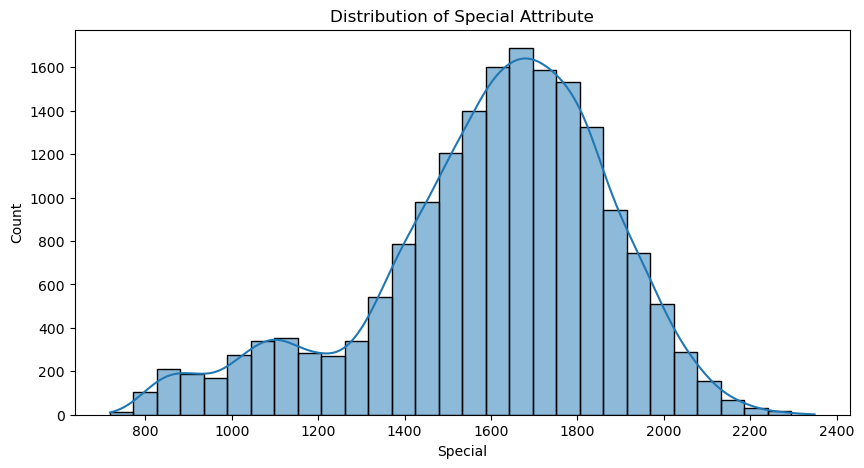

               Name  Special  Overall  Potential             Club
0         L. Suárez     2349       91         91     FC Barcelona
1      A. Griezmann     2293       89         89  Atlético Madrid
2         L. Modrić     2284       91         91      Real Madrid
3          M. Acuña     2281       81         81      Sporting CP
4      K. De Bruyne     2279       91         91  Manchester City
5     R. Nainggolan     2278       85         85            Inter
6   Bruno Fernandes     2277       85         89      Sporting CP
7           Marcelo     2272       86         86      Real Madrid
8       Alex Telles     2267       84         86         FC Porto
9           G. Bale     2266       86         86      Real Madrid


In [24]:
# Summary statistics for the Special column
print(fifa['Special'].describe())

# Distribution plot for Special
plt.figure(figsize=(10,5))
sns.histplot(fifa['Special'], bins=30, kde=True)
plt.title('Distribution of Special Attribute')
plt.xlabel('Special')
plt.show()

# Top 10 players by Special
top_special = fifa.nlargest(10, 'Special')[['Name', 'Special', 'Overall', 'Potential', 'Club']]
print(top_special)

In [25]:
# Special column is a column which is just like overall but with more granularity
# It ranges from 47 to 2200 with mean of 611. It is likely a composite score based on various attributes
# It helps to differentiate players with same overall rating by providing a more detailed score

In [26]:
# Body type has easter egg values like "Messi" and "C. Ronaldo"
# Unique values in Body Type column
print(fifa['Body Type'].unique())

# Find rows with Body Type as 'Messi' or 'C. Ronaldo'
easter_eggs = fifa[fifa['Body Type'].isin(['Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Akinfenwa', 'Courtois'])]
print(easter_eggs[['Name', 'Body Type', 'Overall', 'Special', 'Club']])

['Normal (170-185)' 'Lean (170-185)' 'Stocky (170-185)' 'Normal (185+)'
 'Lean (185+)' 'Normal (170-)' 'C. Ronaldo' 'Messi' 'Mohamed Salah'
 'Lean (170-)' 'Neymar' 'Normal (190+)' 'Stocky (185+)' 'Stocky (170-)'
 'Shaqiri' 'Akinfenwa' 'Courtois']
                     Name   Body Type  Overall  Special                 Club
18      Cristiano Ronaldo  C. Ronaldo       94     2228             Juventus
22               L. Messi       Messi       94     2217         FC Barcelona
88              Neymar Jr      Neymar       92     2150  Paris Saint-Germain
224            X. Shaqiri     Shaqiri       82     2090            Liverpool
10534        A. Akinfenwa   Akinfenwa       66     1586    Wycombe Wanderers
15469         T. Courtois    Courtois       88     1306          Real Madrid


In [27]:
# Clean Body Type Feature in the dataset
def clean_body_type(body_type):
    if pd.isna(body_type):
        return np.nan
    body_type = body_type.strip()
    # List of known body types including easter eggs
    known_types = [
        'Lean', 'Normal', 'Stocky', 'Muscular', 'Average',
        'Akinfenwa', 'Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Courtois'
    ]
    # Extract main type before any parenthesis or space
    import re
    main_type = re.match(r'^(\w+)', body_type)
    # If body_type matches a known type, return as is
    if body_type in known_types:
        return body_type
    # If main_type is in known types, return it
    if main_type and main_type.group(1) in known_types:
        return main_type.group(1)
    # Otherwise, return main_type or original
    if main_type:
        return main_type.group(1)
    return body_type

fifa['Body Type Clean'] = fifa['Body Type'].apply(clean_body_type)
print(fifa[['Body Type Clean', 'Body Type']].value_counts())

Body Type Clean  Body Type       
Normal           Normal (170-185)    6003
Lean             Lean (170-185)      4063
Normal           Normal (185+)       3758
Lean             Lean (185+)         1941
Stocky           Stocky (170-185)     628
Normal           Normal (170-)        606
Lean             Lean (170-)          469
Stocky           Stocky (185+)        368
                 Stocky (170-)         96
Normal           Normal (190+)          4
Akinfenwa        Akinfenwa              1
Neymar           Neymar                 1
C. Ronaldo       C. Ronaldo             1
Courtois         Courtois               1
Mohamed          Mohamed Salah          1
Messi            Messi                  1
Shaqiri          Shaqiri                1
Name: count, dtype: int64


In [28]:
fifa['Height'] = pandas_df['Height']
fifa['Weight'] = pandas_df['Weight']
print(fifa[['Height', 'Weight']].head(10))

  Height  Weight
0    6'0  190lbs
1    5'9  161lbs
2    5'8  146lbs
3    5'8  152lbs
4   5'11  154lbs
5    5'9  170lbs
6   5'10  152lbs
7    5'9  176lbs
8   5'11  157lbs
9    6'1  181lbs


In [29]:
def height_conversion(height):
    try:
        if pd.isna(height):
            return np.nan
        # Remove spaces and handle strings like "5'9"
        height_str = str(height).replace(" ", "")
        if "'" in height_str:
            ft, inch = height_str.split("'")
            ft = float(ft)
            inch = float(inch) if inch else 0
        else:
            # If only feet provided, no inches
            ft = float(height_str)
            inch = 0
        total_cm = (ft * 12 + inch) * 2.54
        return total_cm
    except Exception:
        return np.nan

fifa['Height'] = fifa['Height'].apply(height_conversion)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())
print(fifa['Height'].head())

0    182.88
1    175.26
2    172.72
3    172.72
4    180.34
Name: Height, dtype: float64


In [30]:
value = float(fifa['Weight'][0][0:-3])*0.453592
print('%0.2f'%value)

#in kg
def weight_conversion(weight):
    if(pd.isna(weight))!= True:
        w = int(weight[0:-3])*0.453592
        return w
    else:
        return weight

fifa['Weight'] = fifa['Weight'].apply(weight_conversion)

fifa['Weight'] = fifa['Weight'].fillna(value = fifa['Weight'].mean())

fifa['Weight'][13230:13239]

86.18


13230    83.914520
13231    64.863656
13232    68.038800
13233    78.925008
13234    87.996848
13235    71.213944
13236    83.007336
13237    64.863656
13238    67.131616
Name: Weight, dtype: float64

In [31]:
#Convert height and weight to numeric, i.e into cms and kgs respectfully
print(fifa[['Height', 'Weight']].head(10))

   Height     Weight
0  182.88  86.182480
1  175.26  73.028312
2  172.72  66.224432
3  172.72  68.945984
4  180.34  69.853168
5  175.26  77.110640
6  177.80  68.945984
7  175.26  79.832192
8  180.34  71.213944
9  185.42  82.100152


In [32]:
fifa['Joined'] = pandas_df['Joined']

In [33]:
#Convert joined date to datetime
def date_conversion(date):
    if pd.isna(date):
        return np.nan
    if isinstance(date, str):
        try:
            # Try parsing with pandas to_datetime, dayfirst for European format
            dt = pd.to_datetime(date, errors='coerce', dayfirst=True)
            if pd.isna(dt):
                # Try parsing with common formats manually
                for fmt in ['%b %d, %Y', '%d %b %Y', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y']:
                    try:
                        dt = pd.to_datetime(date, format=fmt, errors='coerce')
                        if not pd.isna(dt):
                            return dt
                    except Exception:
                        continue
            return dt
        except Exception:
            return np.nan
    return np.nan

fifa['Joined'] = fifa['Joined'].apply(date_conversion)
print(fifa['Joined'].head(10))

0   2014-07-11
1   2014-07-28
2   2012-08-01
3          NaT
4   2015-08-30
5   2018-07-01
6          NaT
7   2007-01-01
8   2016-07-13
9   2013-09-02
Name: Joined, dtype: datetime64[ns]


In [34]:
#Convert work rate to categorical low, medium, high
def work_rate_conversion(rate):
    if pd.isna(rate):
        return (np.nan, np.nan)
    if isinstance(rate, str) and '/' in rate:
        try:
            attack, defense = rate.split('/')
            return (attack.strip(), defense.strip())
        except Exception:
            return (np.nan, np.nan)
    return (np.nan, np.nan)

fifa[['Attacking Work Rate', 'Defensive Work Rate']] = fifa['Work Rate'].apply(work_rate_conversion).apply(pd.Series)
fifa[['Work Rate', 'Attacking Work Rate', 'Defensive Work Rate']].head(10)

,Work Rate,Attacking Work Rate,Defensive Work Rate
0,High/ Medium,High,Medium
1,High/ High,High,High
2,High/ High,High,High
3,High/ High,High,High
4,High/ High,High,High
5,High/ High,High,High
6,High/ High,High,High
7,High/ Low,High,Low
8,High/ Medium,High,Medium
9,Medium/ Medium,Medium,Medium


In [35]:
#Clean the loaned from column
import re

pattern = re.compile(r">(.*?)<")  # capture everything between > and <

fifa["Loaned From_clean"] = fifa["Loaned From"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Loaned From", "Loaned From_clean"]].head(10))

#it will show Nan/None for players who are not on loan
#other unique values are clubs from which players are loaned come later up in the dataset

  Loaned From Loaned From_clean
0         NaN              None
1         NaN              None
2         NaN              None
3         NaN              None
4         NaN              None
5         NaN              None
6         NaN              None
7         NaN              None
8         NaN              None
9         NaN              None


In [36]:
#Find Loan Sharks from loaned from column
fifa['Loaned From_clean'].value_counts().head(10)

Loaned From_clean
Atalanta        21
Sassuolo        18
Udinese         17
Sporting CP     16
Fiorentina      15
Racing Club     15
Genoa           15
Watford         14
SL Benfica      14
Leeds United    13
Name: count, dtype: int64

## Final Fifa Dataset Looks like

In [37]:
# Drop Work Rate, body Type, Position, Loaned From as we cleaned them and have better dataset columns now
cols_to_drop = ['Work Rate', 'Body Type', 'Position', 'Loaned From']
fifa = fifa.drop(columns=cols_to_drop)
print(fifa.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'Position_clean', 'Body Type Clean', 'Attacking Work Rate',
       'Defensive Work Rate', 'Loaned From_clean'],
      dtype='object')


In [38]:
fifa.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Position_clean,Body Type Clean,Attacking Work Rate,Defensive Work Rate,Loaned From_clean
0,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,450000.0,2349,...,33.0,37.0,ST,87.0,€164M,ST,Normal,High,Medium,None
1,194765,A. Griezmann,27,France,89,89,Atlético Madrid,71000000.0,140000.0,2293,...,13.0,14.0,LW,87.0,€145.6M,RS,Lean,High,High,None
2,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,425000.0,2284,...,14.0,9.0,CM,88.0,€137.4M,RCM,Lean,High,High,None
3,224334,M. Acuña,26,Argentina,81,81,Sporting CP,19000000.0,20000.0,2281,...,13.0,14.0,LM,81.0,€38M,SUB,Stocky,High,High,None
4,192985,K. De Bruyne,27,Belgium,91,91,Manchester City,93000000.0,350000.0,2279,...,10.0,13.0,CAM,89.0,€172.1M,RCM,Normal,High,High,None
5,178518,R. Nainggolan,30,Belgium,85,85,Inter,35500000.0,100000.0,2278,...,8.0,11.0,CDM,85.0,€60.4M,CAM,Stocky,High,High,None
6,212198,Bruno Fernandes,23,Portugal,85,89,Sporting CP,50000000.0,20000.0,2277,...,8.0,14.0,CAM,84.0,€103.8M,SUB,Lean,High,High,None
7,176676,Marcelo,30,Brazil,86,86,Real Madrid,32000000.0,225000.0,2272,...,5.0,9.0,LM,85.0,€65.6M,LB,Normal,High,Low,None
8,212462,Alex Telles,25,Brazil,84,86,FC Porto,31000000.0,20000.0,2267,...,11.0,14.0,LWB,83.0,€64.3M,LB,Lean,High,Medium,None
9,173731,G. Bale,28,Wales,86,86,Real Madrid,45000000.0,275000.0,2266,...,5.0,6.0,ST,86.0,€92.3M,SUB,Lean,Medium,Medium,None


In [39]:
skim(fifa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17943  │ │ float64     │ 43    │                                                          │
│ │ Number of columns │ 62     │ │ string      │ 13    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA ┃ NA %        ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID         │  0 │           0 │  216400 │   28990 │    16 │ 202000 │ 223700 │  238400 │    253200 │    ▁▃▇ │  │
│ │ Age        │  0 │           0 │    24.7 │   4.693 │    15 │     21 │     24 │      28 │        45 │  ▃▇▇▃  │  │
│ │ Overall    │  0 │           0 │   66.33 │    6.88 │    48 │     62 │     66 │      71 │        94 │ ▁▅▇▅▁  │  │
│ │ Potential  │  0 │           0 │   71.39 │   6.109 │    49 │     67 │     71 │      75 │        95 │  ▂▇▇▂  │  │
│ │ Value      │  0 │           0 │ 2471000 │ 5669000 │     0 │ 325000 │ 700000 │ 2000000 │ 110500000 │   ▇    │  │
│ │ Wage       │  0 │           0 │    9421 │   21050 │     0 │   2000 │   3000 │    8000 │    575000 │   ▇    │  │
│ │ Special    │  0 │           0 │    1599 │   276.6 │   718 │   1459 │   1639 │    1790 │      2349 │ ▁▂▃▇▃  │  │
│ │ Internatio │  0 │           0 │   1.108 │  0.3856 │     1 │      1 │      1 │       1 │         5 │   ▇▁   │  │
│ │ nal        │    │             │         │         │       │        │        │         │           │        │  │
│ │ Reputation │    │             │         │         │       │        │        │         │           │        │  │
│ │ Weak Foot  │  0 │           0 │   2.947 │   0.665 │     1 │      3 │      3 │       3 │         5 │  ▃ ▇▂  │  │
│ │ Skill      │  0 │           0 │   2.368 │  0.7659 │     1 │      2 │      2 │       3 │         5 │ ▂▇ ▆▁  │  │
│ │ Moves      │    │             │         │         │       │        │        │         │           │        │  │
│ │ Jersey     │ 14 │ 0.078024856 │    20.5 │   16.53 │     1 │      9 │     18 │      28 │        99 │  ▇▆▂   │  │
│ │ Number     │    │     4899961 │         │         │       │        │        │         │           │        │  │
│ │ Height     │  0 │           0 │   181.3 │   6.781 │ 154.9 │  175.3 │  180.3 │   185.4 │     205.7 │  ▁▅▇▂  │  │
│ │ Weight     │  0 │           0 │   75.32 │   7.106 │  49.9 │  69.85 │  74.84 │   79.83 │     110.2 │   ▅▇▃  │  │
│ │ Crossing   │  0 │           0 │   49.87 │   18.43 │     5 │     38 │     54 │      64 │        93 │ ▂▂▅▇▆  │  │
│ │ Finishing  │  0 │           0 │   45.48 │   19.61 │     2 │     30 │     49 │      62 │        95 │ ▃▅▆▇▅  │  │
│ │ HeadingAcc │  0 │           0 │   52.24 │   17.49 │     4 │     45 │     56 │      64 │        94 │ ▂▁▃▇▅  │  │
│ │ uracy      │    │             │         │         │ 

## Graphs(temp)

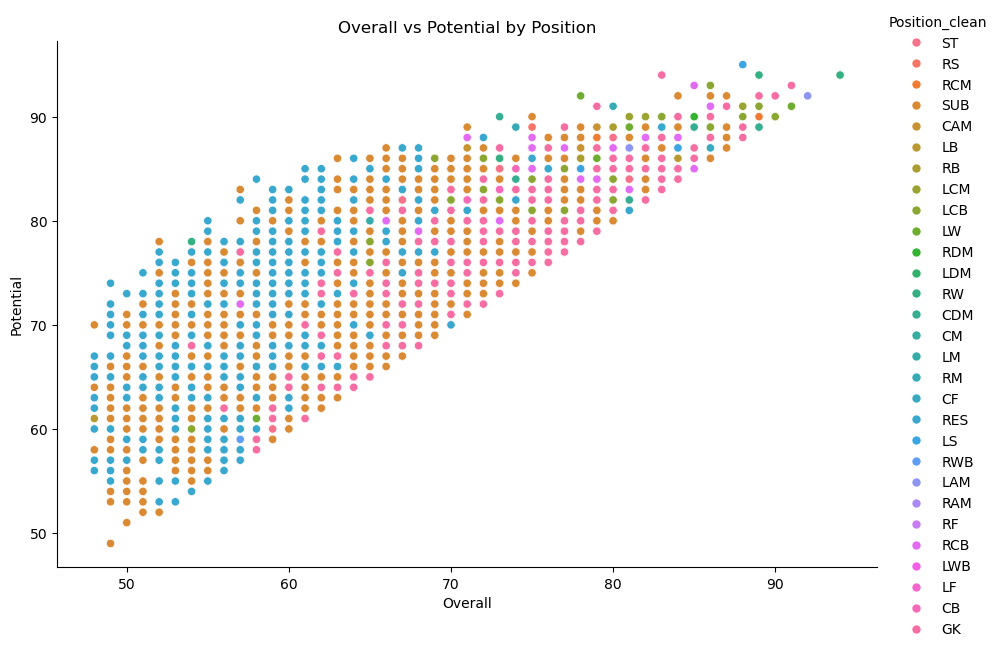

In [40]:
sns.relplot(data=fifa, x='Overall', y='Potential', hue='Position_clean', kind='scatter', height=6, aspect=1.5)
plt.title('Overall vs Potential by Position')
plt.show()

In [41]:
#highest potential players
top_potential = pandas_df.nlargest(10, 'Potential')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Potential:")
print(top_potential)

Top 10 Players by Potential:
                     Name  Overall  Potential                 Club   Wage
132             K. Mbappé       88         95  Paris Saint-Germain  €100K
18      Cristiano Ronaldo       94         94             Juventus  €400K
22               L. Messi       94         94         FC Barcelona  €575K
213             P. Dybala       89         94             Juventus  €200K
15639       G. Donnarumma       83         94                Milan   €30K
1005           M. de Ligt       85         93                 Ajax   €15K
3775          M. Škriniar       86         93                Inter   €90K
15275            J. Oblak       91         93      Atlético Madrid  €120K
53                H. Kane       90         92    Tottenham Hotspur  €200K
88              Neymar Jr       92         92  Paris Saint-Germain  €300K


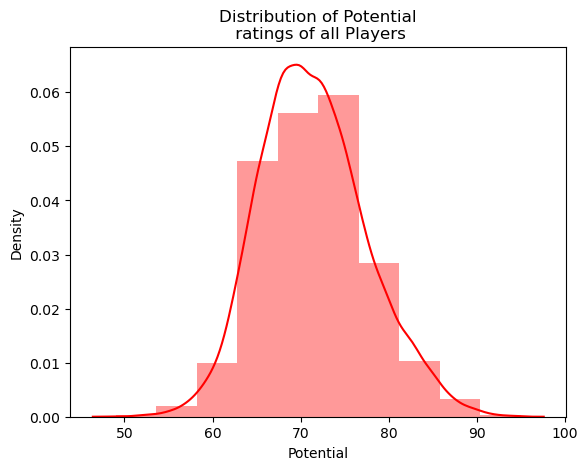

In [42]:
# Distribution of Potential ratings
sns.distplot(fifa['Potential'], bins=10, color='r')
plt.title("Distribution of Potential\n ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [43]:
#highest overall players
top_overall = pandas_df.nlargest(10, 'Overall')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Overall:")
print(top_overall)

Top 10 Players by Overall:
                     Name  Overall  Potential                 Club   Wage
18      Cristiano Ronaldo       94         94             Juventus  €400K
22               L. Messi       94         94         FC Barcelona  €575K
88              Neymar Jr       92         92  Paris Saint-Germain  €300K
0               L. Suárez       91         91         FC Barcelona  €450K
2               L. Modrić       91         91          Real Madrid  €425K
4            K. De Bruyne       91         91      Manchester City  €350K
105             E. Hazard       91         91              Chelsea  €325K
15275            J. Oblak       91         93      Atlético Madrid  €120K
17           Sergio Ramos       90         90          Real Madrid  €300K
53                H. Kane       90         92    Tottenham Hotspur  €200K


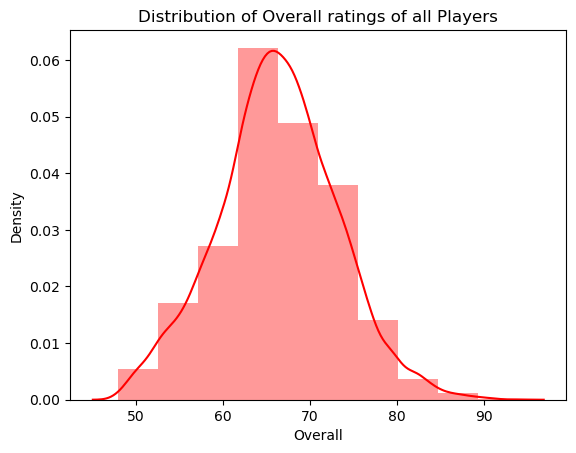

In [44]:
# Distribution of Overall ratings
sns.distplot(fifa['Overall'], bins=10, color='r')
plt.title("Distribution of Overall ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [45]:
# Save the final dataframe to a CSV file
fifa.to_csv('fifa_dataset_cleaned/fifa_final19.csv', index=False)